<a href="https://colab.research.google.com/github/mamatqobulovsardor/K-Means-klasterlashni-Seaborn-vizualizatsiya/blob/main/K_Means_klasterlashni_Seaborn_vizualizatsiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-Means klasterlashni Seaborn vizualizatsiyasi yordamida avtomobillar ma'lumotlar to'plamida amalga oshirish.  
### Ma'lumotlar to'plami haqida:  
Ma'lumotlar to'plamida quyidagi 8 ta parametr mavjud. Ularning tavsifi:  

1. **mpg** - "Miles Per Gallon" (milya boshiga yoqilg'i): avtomobilning yoqilg'i samaradorligini bildiradi. Odatda, kuchsizroq dvigatelli mashinalar ko'proq mileage ko'rsatkichiga ega bo'ladi.  

2. **cylinders** - Silindrlar: dvigatelning ichki qismi bo'lib, tezlashuv quvvatini beradi. Qanchalik ko'p silindr bo'lsa, avtomobil tezroq harakatlanish quvvatiga ega bo'ladi.  

3. **cubicinches** - Kubik dyuym: dvigatelning ichki hajmi, odatda kubik dyuymda (Amerikalik dvigatellar), kubik santimetrda (kichik import avtomobillari) yoki litrda (katta import avtomobillari) o'lchanadi. Masalan, 350 dvigatel 350 kubik dyuym hajmdagi yoqilg'i va havo bilan to'ldirilishi mumkin bo'lgan maydonni bildiradi.  

4. **hp** - Horsepower (ot kuchi): dvigatel quvvatini bildiradi. Buni odatda "torque" deb ham atashadi. Bu avtomobilni bir joydan boshqa joyga ko'chirish uchun kerak bo'lgan kuchni anglatadi.  

5. **weightlbs** - Avtomobil og'irligi (funtlarda).  

6. **time-to-60** - 60 milya/soat (yoki 100 km/soat) tezlikka yetish uchun avtomobil sarflaydigan vaqt (soniyalarda).  

7. **year** - Avtomobil qaysi yilda chiqarilganligini bildiradi.  

8. **brand** - Avtomobilning dizayn qilingan mamlakati (AQSh, Yevropa yoki Yaponiya).  

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
!wget https://raw.githubusercontent.com/yug95/MachineLearning/refs/heads/master/Dataset/cars.csv

--2024-12-12 06:08:43--  https://raw.githubusercontent.com/yug95/MachineLearning/refs/heads/master/Dataset/cars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8724 (8.5K) [text/plain]
Saving to: ‘cars.csv.1’

cars.csv.1          100%[===================>]   8.52K  --.-KB/s    in 0s      

2024-12-12 06:08:43 (68.8 MB/s) - ‘cars.csv.1’ saved [8724/8724]



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/yug95/MachineLearning/refs/heads/master/Dataset/cars.csv")
df.columns = df.columns.str.replace(' ','')

In [ ]:
le =LabelEncoder().fit(df['brand'])
df['brand'] = le.transform(df['brand'])

df = df.loc[df.cubicinches !=' ']
df = df.loc[df.weightlbs !=' ']

df[['cubicinches', 'wieghtlbs']] = df[['cubicinches', 'weightlbs']].astype(int)

In [ ]:
L = list(le.inverse_transform(df['brand']))
d = dict(zip(le.classes_, le.transform(le.classes_)))
print (d)

{' Europe.': 0, ' Japan.': 1, ' US.': 2}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    int64  
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    object 
 5   time-to-60   256 non-null    int64  
 6   year         256 non-null    int64  
 7   brand        256 non-null    int64  
 8   wieghtlbs    256 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 20.0+ KB


<ipython-input-16-df170d42c15c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cylinders', y='mpg', data=df, palette='coolwarm')


<Axes: xlabel='cylinders', ylabel='mpg'>

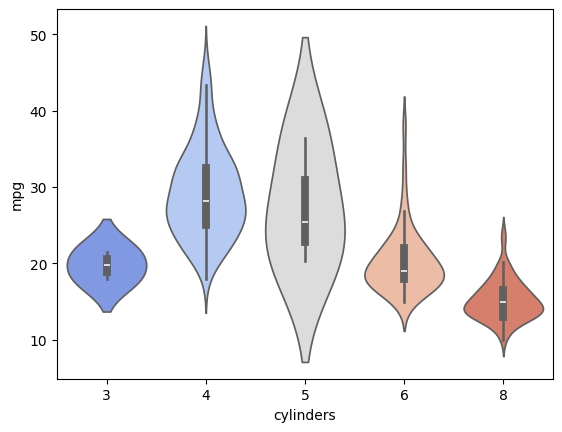

In [ ]:
sns.violinplot(x='cylinders', y='mpg', data=df, palette='coolwarm')

<Axes: xlabel='year', ylabel='count'>

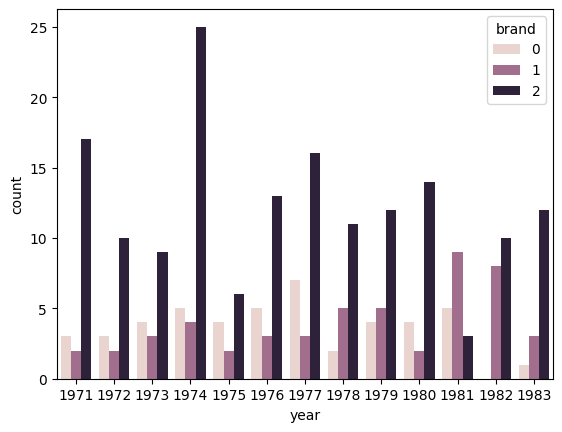

In [ ]:
sns.countplot(x='year', hue='brand', data=df)


#Qaytadtan yozib chiqish kerak

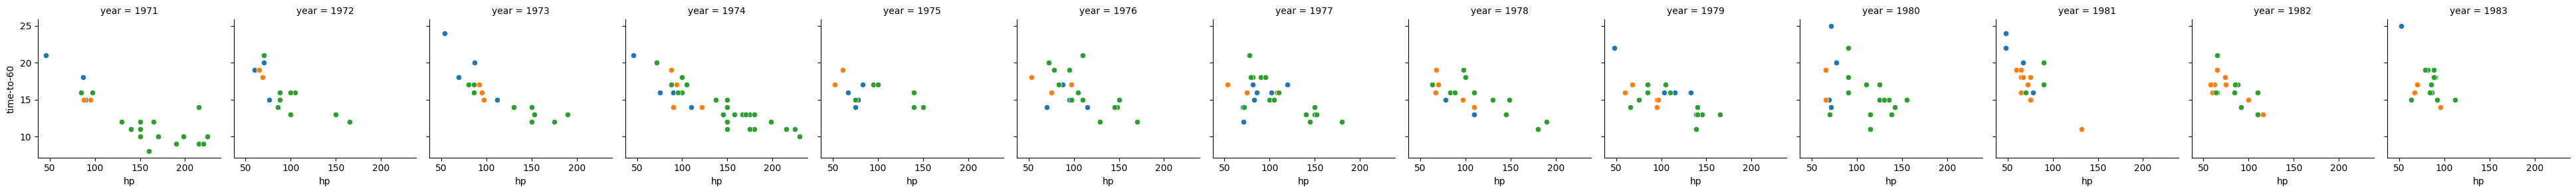

In [ ]:
g = sns.FacetGrid(col='year',hue='brand',data=df,legend_out=False)
g.map(sns.scatterplot,'hp','time-to-60')

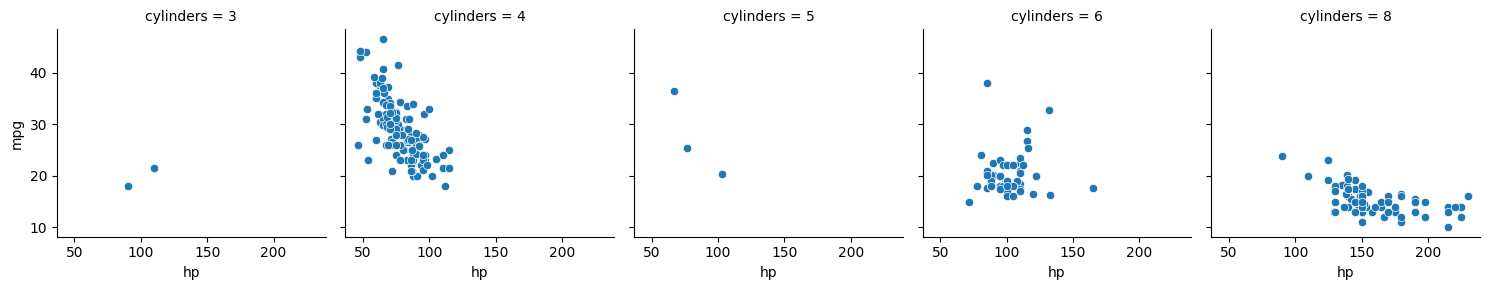

In [ ]:
g = sns.FacetGrid(col='cylinders',data=df,legend_out=False)
g.map(sns.scatterplot,'hp','mpg')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

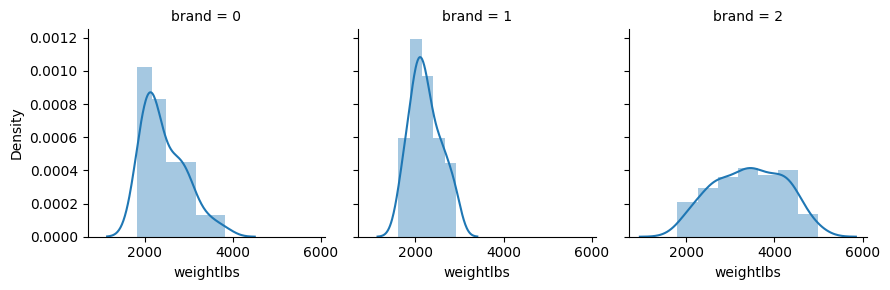

In [ ]:
g = sns.FacetGrid(col='brand',data=df,legend_out=False)
g.map(sns.distplot,'weightlbs')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

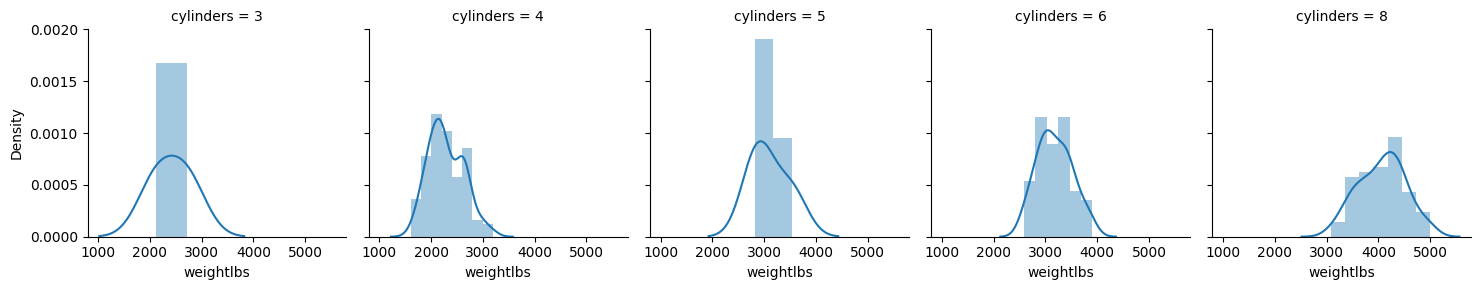

In [ ]:
g = sns.FacetGrid(col='cylinders',data=df,legend_out=False)
g.map(sns.distplot,'weightlbs')

In [ ]:
sns.scatterplot(df.cubicinches,df.weightlbs)


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given